# CRISP-DM

### Business Understanding
Airbnb is a company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Data from numerous listings in Seattle and Boston gives great opportunity for gaining insight into the various factors that affect the 'performance' of an Airbnb. Information on the host-driven variables of listings can be analysed and compared to listings with similar immutable characteristics such as location or size.

Say I'm a highly-wealthy individual who just so happens to spend alternating weeks in Boston and Seattle. Maybe I support the Red Sox but I also love watching the sun set over the ocean. Who knows. Who cares? Regardless, with my stacks and stacks of sweet, sweet binary digits, stored in a number of large financial institutions, I'm considering the opportunity that operating one or more Airbnbs in each city might offer. As a savvy businessman I may want to know:

- What is the pricing like for Airbnbs by suburb or by listing type?
- What is the competitive landscape like for Airbnb management? Are there many single hosts with multiple properties?
- Do hosts with many listings prefer a particular type of property?

With the right dataset I can turn my squillions into bazillions - assuming something like a global pandemic doesn't inhibit tourists from handing over their glorious dollarydoos...


### Data Understanding
The Airbnb data has been sourced from [this Kaggle page](https://www.kaggle.com/airbnb/seattle/data) (for Seattle) and [this Kaggle page](https://www.kaggle.com/airbnb/boston/data) (for Boston). Each contains 3 .csv files of data for the respective Airbnb markets. The listing file contains extensive information on the listing, host attributes, and review scores. The review file contains a summary of the review comments for a given listing ID. The calendar file contains a snapshot of the availability and pricing of the available days, for the year of 2016. All files contain data of high quality though many columns may have Nan values - these will be dealt with in the context of the analysis being performed.

### Data Preparation
The cell below imports each of the data sets and the relevant packages for this analysis. First it is worth noting that the datetimes and prices are in strings. Converting these to datetime and float values:

In [2]:
#Import relevant Python packages for the analysis and plotting of the datasets
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None #fixing a false-positive chained index warning

#Changing settings to enable you to scroll through the entirety of these beautiful dataframes!
pd. set_option("display.max_rows", None)
pd. set_option("display.max_columns", None)

#Define folder path of data file location
folder_path = "C:\\Users\\EMCINDOE\\nanodegree\\project_1\\"

#Import Airbnb data files for Seattle and Boston
seattle_calendar_df = pd.read_csv(folder_path + "seattle_calendar.csv")
seattle_listings_df = pd.read_csv(folder_path + "seattle_listings.csv")
seattle_reviews_df = pd.read_csv(folder_path + "seattle_reviews.csv")

boston_calendar_df = pd.read_csv(folder_path + "boston_calendar.csv")
boston_listings_df = pd.read_csv(folder_path + "boston_listings.csv")
boston_reviews_df = pd.read_csv(folder_path + "boston_reviews.csv")


#Convert date strings to datetime
seattle_calendar_df['date'] = pd.to_datetime(seattle_calendar_df['date'])
boston_calendar_df['date'] = pd.to_datetime(boston_calendar_df['date'])

#Convert price strings to floats
price_columns = ['price', 'weekly_price', 'monthly_price']

for p in price_columns:
    seattle_listings_df[p] = seattle_listings_df[p].replace('[\$,]', '', regex=True).astype(float)
    boston_listings_df[p] = seattle_listings_df[p].replace('[\$,]', '', regex=True).astype(float)
    
seattle_calendar_df['price'] = seattle_calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
boston_calendar_df['price'] = seattle_calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)


To answer the questions posed above we need reliable data on:
- Listing neighbourhood, property/room type, and price
- Host ID, number of listings, neighbourhoods, type, and price
- Calendar availability, listing max length of stay

The column headers for the 'listings' dataframes (and the percentage of non-Nan values in each column) are shown below. If you want to scroll the dataframe rather than showing the whole thing just click to the left of the output cell, under where it says 'Out'.

In [3]:
#This returns a dataframe with an index formed from the column headers of the input dataframes, and column
#values showing the fraction of Nan values in each city's data.
def nans_df(df_seattle, df_boston):
    return pd.DataFrame({'Seattle' : (1-df_seattle.isna().mean()),
           'Boston' : (1-df_boston.isna().mean())},
           columns = ['Seattle','Boston'], index = list(df_seattle.columns))

nans_df(seattle_listings_df, boston_listings_df)

,Seattle,Boston
id,1.000000,1.000000
listing_url,1.000000,1.000000
scrape_id,1.000000,1.000000
last_scraped,1.000000,1.000000
name,1.000000,1.000000
summary,0.953641,0.960112
space,0.850969,0.705160
description,1.000000,1.000000
experiences_offered,1.000000,1.000000
neighborhood_overview,0.729701,0.605300


Repeating for the calendar and reviews dataframes:

In [4]:
nans_df(seattle_calendar_df, boston_calendar_df)

,Seattle,Boston
listing_id,1.00000,1.000000
date,1.00000,1.000000
available,1.00000,1.000000
price,0.67061,0.668938


In [5]:
nans_df(seattle_reviews_df, boston_reviews_df)

,Seattle,Boston
listing_id,1.000000,1.000000
id,1.000000,1.000000
date,1.000000,1.000000
reviewer_id,1.000000,1.000000
reviewer_name,1.000000,1.000000
comments,0.999788,0.999224


As you can see the data from all dataframes is mostly complete. Note that in the 'calendar' data the price is a Nan value if the listing is not available for that day. In the calendar and reviews dataframes we therefore have almost fully complete data.

We can inspect the completeness of the data from 'listings' needed to answer our questions by looking at some specific columns. These (along with the trimmed version of the nans_df showing their completeness) are shown below.

In [6]:
interesting_columns = ['id', 'host_id', 'host_listings_count', 'neighbourhood_cleansed',
                       'latitude', 'longitude', 'zipcode', 'property_type', 'room_type',
                       'price', 'weekly_price', 'monthly_price', 'maximum_nights']

nans_df(seattle_listings_df, boston_listings_df).loc[interesting_columns]

,Seattle,Boston
id,1.000000,1.000000
host_id,1.000000,1.000000
host_listings_count,0.999476,1.000000
neighbourhood_cleansed,1.000000,1.000000
latitude,1.000000,1.000000
longitude,1.000000,1.000000
zipcode,0.998167,0.989400
property_type,0.999738,0.999163
room_type,1.000000,1.000000
price,1.000000,1.000000


As can be seen this is also a very complete dataset. Weekly and monthly price data is the only exception - this will be investigated further in conjunction with the maximum stay period.


We have found that our data is almost entirely complete with a minimal fraction of Nan values with few exceptions. We can now start formatting the data to answer our questions.

###### Q1 - How is price affected by suburb? By listing type? By number of beds?

To get a preliminary idea we can look at the mean price for each of these factors. This will involve creating a function that will prove quite useful for the rest of the analysis.

In [7]:
#This function accepts a dataframe and 2 column labels from that dataframe as 'attributes'. The function groups the
#dataframe by the grouping attribute then calculates the mean value of the mean attribute for each group.
#It puts the lotion on its.... sorry, it puts this data into a dataframe and sorts by the means in descending order.
#The sorted dataframe is the output (including a count of listings in the grouping_attribute group for some context)
def mean_by_attribute(df, grouping_attribute, mean_attribute):
    data = df.groupby(grouping_attribute)[mean_attribute].mean()
    data = pd.DataFrame(data).sort_values(mean_attribute, ascending=False)
    data['count'] = df.groupby(grouping_attribute)[mean_attribute].count()
    return data

mean_by_attribute(seattle_listings_df, 'neighbourhood_cleansed', 'price')

#Side note - I'm amazed at DataFrameGroupbyObjects automatically matching the index to the "data" index in that 3rd line
#Don't know if I'm missing something as I'm not an especially proficient coder but wow is that slick!

,price,count
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,17
Portage Bay,227.857143,14
Westlake,194.470588,17
West Queen Anne,187.769231,65
Montlake,182.789474,19
Briarcliff,176.571429,14
Sunset Hill,176.055556,18
Industrial District,173.333333,6
Alki,171.619048,42


In [8]:
mean_by_attribute(boston_listings_df, 'neighbourhood_cleansed', 'price')

,price,count
neighbourhood_cleansed,,
Roslindale,197.678571,56
Longwood Medical Area,183.666667,9
Bay Village,164.500000,24
Back Bay,160.278146,302
Charlestown,152.936937,111
Chinatown,148.338028,71
Leather District,143.000000,5
East Boston,138.940000,150
Mission Hill,138.379032,124


In [9]:
mean_by_attribute(seattle_listings_df, 'property_type', 'price')

,price,count
property_type,,
Boat,282.375000,8
Condominium,151.109890,91
Loft,135.700000,40
House,132.351414,1733
Townhouse,129.457627,118
Apartment,122.932670,1708
Camper/RV,120.461538,13
Bungalow,115.615385,13
Bed & Breakfast,112.054054,37


In [10]:
mean_by_attribute(boston_listings_df, 'property_type', 'price')

,price,count
property_type,,
Guesthouse,450.000000,1
Townhouse,148.555556,54
Boat,144.166667,12
Bed & Breakfast,138.000000,41
Condominium,134.147186,231
House,133.046263,562
Loft,129.974359,39
Apartment,125.874809,2612
Entire Floor,115.000000,4


In [11]:
mean_by_attribute(seattle_listings_df, 'room_type', 'price')

,price,count
room_type,,
Entire home/apt,155.843369,2541
Private room,75.044828,1160
Shared room,47.547009,117


In [12]:
mean_by_attribute(boston_listings_df, 'room_type', 'price')

,price,count
room_type,,
Entire home/apt,128.259050,2127
Private room,127.968795,1378
Shared room,120.300000,80


Although this is a very rudimentary analysis of the data, it's interesting to note the patterns. As expected, there is a wide spread in both cities in terms of both mean pricing and number of listings in each neighbourhood. Looking at property types, the overwhelming majority of listings are either houses, apartments, or condominiums in both cities. Perhaps surprisingly houses are not the highest-priced, in both cities - this is worth investigating. So is the room type - in Seattle there is a significant discrepancy between entire homes/apartments and private or shared rooms that does not exist in Boston.

We can start by looking at a quick histogram of the price of each room type in each city to get a sense of the distribution of pricing. Ideally we would do this for the property types and neighbourhoods too but there's only so many histograms that can be squeezed into a notebook.

For these histograms we have 

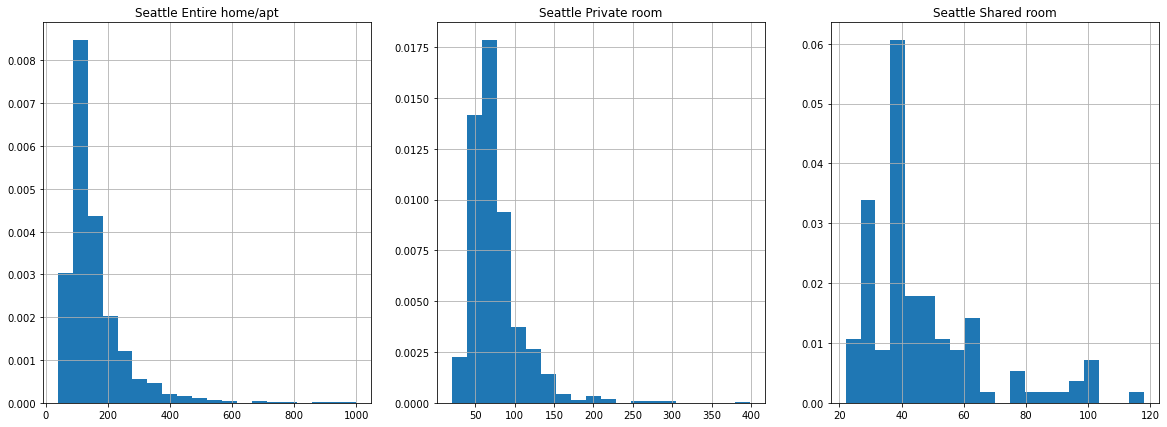

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

for i in range(3):
    seattle_listings_df[seattle_listings_df['room_type'] == seattle_listings_df['room_type'].unique()[i]]['price'].hist(bins = 20, density=True, ax=ax[i])
    ax[i].set_title('Seattle ' + seattle_listings_df['room_type'].unique()[i])

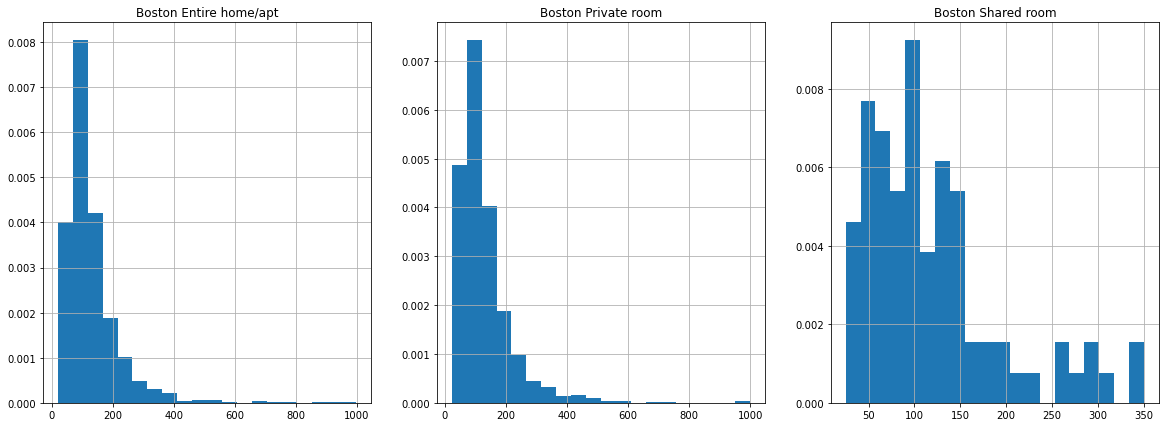

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

for i in range(3):
    boston_listings_df[boston_listings_df['room_type'] == boston_listings_df['room_type'].unique()[i]]['price'].hist(bins = 20, density=True, ax=ax[i])
    ax[i].set_title('Boston ' + boston_listings_df['room_type'].unique()[i])
    

Unfortunately to determine the return on investment of each type you would need extensive booking utilisation and property value data - a bit beyond the scope of this quick analysis! Maybe if I actually had the money to do something like this...


Moving onto the next question - we want to know about hosts with multiple properties. The people you'll be competing with for tenants and profits.

##### Q2 - How many properties does the typical host manage?

We can look at a histogram to see the distribution of ownership:

In [29]:
boston_listings_df.groupby('host_listings_count')['host_id'].nunique()

host_listings_count
0         2
1      1616
2       297
3        94
4        48
5        29
6        18
7        17
8         8
9         3
10        2
11        6
12        4
13        4
14        3
15        2
16        3
17        2
18        3
20        2
21        1
22        3
24        2
28        1
30        1
37        1
45        1
52        1
71        1
122       1
307       1
313       1
363       1
558       1
749       1
Name: host_id, dtype: int64

What we can see here is that it is exceedingly rare for a host to have more than a couple of listings. The hosts with many more than this are likely operating AirBnB-focused businesses. As a quick sanity check lets look at the the number of unique streets for these hosts:

In [64]:
for i in boston_listings_df['host_listings_count'].sort_values().unique()[20:]:
    print("Host has " + str(i) + " listings at " + str(len(boston_listings_df[boston_listings_df['host_listings_count']==i]['street'].unique())) + " unique addresses")
    print(boston_listings_df[boston_listings_df['host_listings_count']==i]['property_type'].unique())

Host has 21 listings at 8 unique addresses
['Apartment']
Host has 22 listings at 18 unique addresses
['Apartment' 'Other']
Host has 24 listings at 12 unique addresses
['Apartment' 'House' 'Other']
Host has 28 listings at 2 unique addresses
['Apartment']
Host has 30 listings at 13 unique addresses
['Apartment' 'Condominium']
Host has 37 listings at 11 unique addresses
['Condominium' 'Apartment' 'Townhouse' 'Bed & Breakfast']
Host has 45 listings at 1 unique addresses
['Apartment']
Host has 52 listings at 5 unique addresses
['Apartment']
Host has 71 listings at 1 unique addresses
['Apartment']
Host has 122 listings at 7 unique addresses
['Apartment']
Host has 307 listings at 5 unique addresses
['Apartment']
Host has 313 listings at 18 unique addresses
['Apartment']
Host has 363 listings at 20 unique addresses
['Loft' 'Apartment' 'Condominium' nan]
Host has 558 listings at 31 unique addresses
['Apartment']
Host has 749 listings at 18 unique addresses
['Apartment']


For the hosts with 20-30 listings it seems reasonable that they could manage this many properties through a small company even if they are all at different addresses. For the hosts with hundreds of listings it seems reasonable that existing hotels could contact an agency to list their rooms on AirBnB to secure more bookings, or that a sufficiently-equitable company could purchase multiple apartment blocks with the intention of generating revenue by listing the rooms on AirBnB. We cannot confirm the nature of these hosts without more data but we will include them due to their plausibility.

This simultaneously answers another question - hosts with many properties definitely prefer apartments overwhelmingly, and utilise other small property types much more than houses.